In [17]:
#install.packages('purrr')
#install.packages('dplyr')
#install.packages('dslabs')
#install.packages('tidyr')
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
library(purrr)
library(dplyr)
library(dslabs)
library(tidyr)
library(ggplot2)

data('movielens')

train_small <- movielens %>% 
  group_by(movieId) %>%
  filter(n() >= 50 | movieId == 3252) %>% ungroup() %>% 
  group_by(userId) %>%
  filter(n() >= 50) %>% ungroup()

y <- train_small %>% 
  select(userId, movieId, rating) %>%
  spread(movieId, rating) %>%
  as.matrix()

In [19]:
rownames(y)<- y[,1]
y <- y[,-1]

movie_titles <- movielens %>% 
  select(movieId, title) %>%
  distinct()

colnames(y) <- with(movie_titles, title[match(colnames(y), movieId)])

In [20]:
y <- sweep(y, 2, colMeans(y, na.rm=TRUE))
y <- sweep(y, 1, rowMeans(y, na.rm=TRUE))

Warning message:
“Removed 199 rows containing missing values (geom_point).”

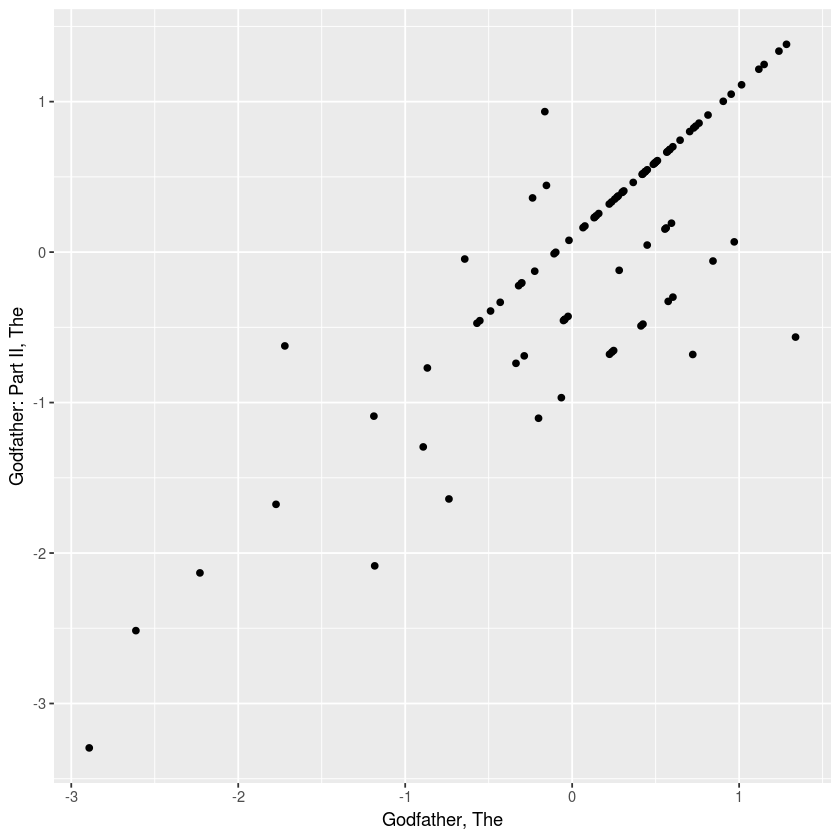

In [21]:
m_1 <- "Godfather, The"
m_2 <- "Godfather: Part II, The"
qplot(y[ ,m_1], y[,m_2], xlab = m_1, ylab = m_2)

Warning message:
“Removed 204 rows containing missing values (geom_point).”

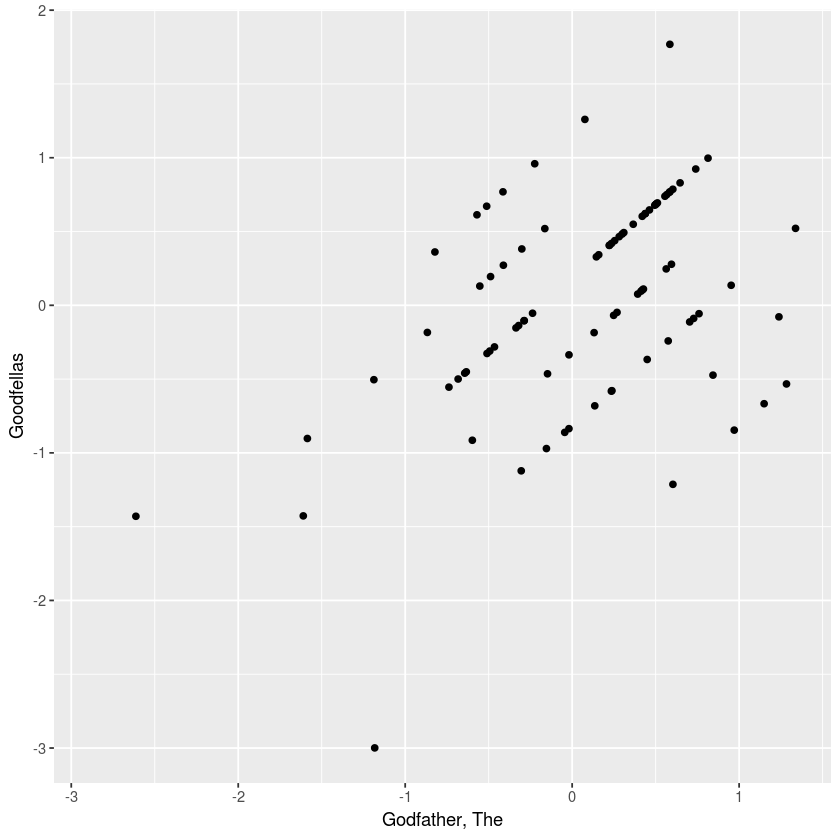

In [24]:
m_1 <- "Godfather, The"
m_3 <- "Goodfellas"
qplot(y[ ,m_1], y[,m_3], xlab = m_1, ylab = m_3)

Warning message:
“Removed 259 rows containing missing values (geom_point).”

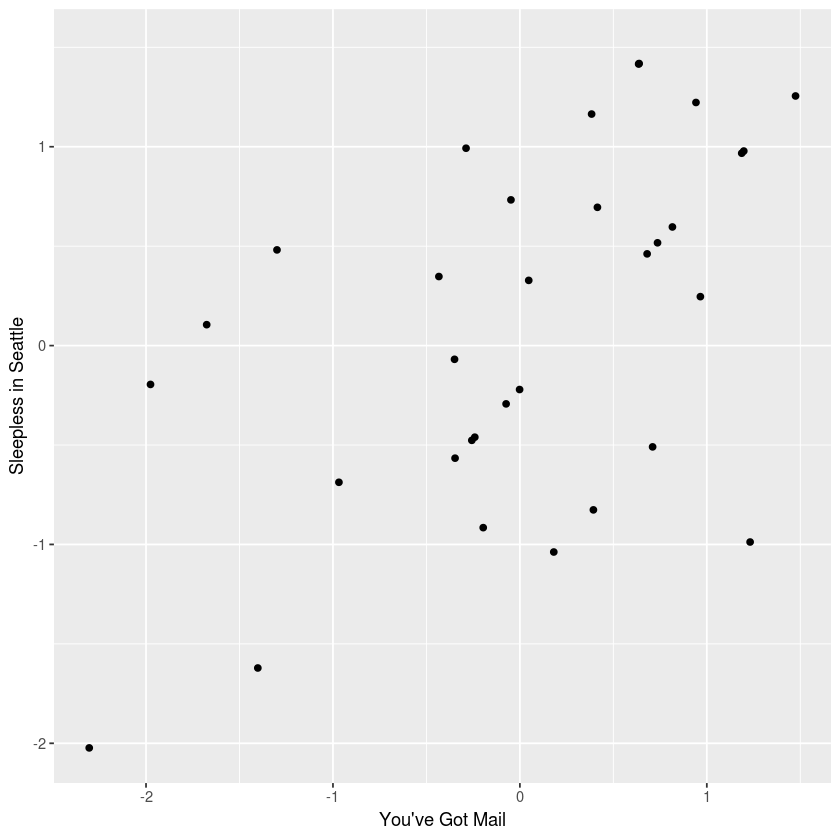

In [25]:
m_4 <- "You've Got Mail" 
m_5 <- "Sleepless in Seattle" 
qplot(y[ ,m_4], y[,m_5], xlab = m_4, ylab = m_5)

In [26]:
x <- y[, c(m_1, m_2, m_3, m_4, m_5)]
colnames(x)[1:2] <- c("Godfather", "Godfather 2")
cor(x, use="pairwise.complete") %>% knitr::kable()



|                     |  Godfather| Godfather 2| Goodfellas| You've Got Mail| Sleepless in Seattle|
|:--------------------|----------:|-----------:|----------:|---------------:|--------------------:|
|Godfather            |  1.0000000|   0.8285097|  0.4441251|      -0.4396801|           -0.3780517|
|Godfather 2          |  0.8285097|   1.0000000|  0.5212559|      -0.3306926|           -0.3578050|
|Goodfellas           |  0.4441251|   0.5212559|  1.0000000|      -0.4810451|           -0.4020508|
|You've Got Mail      | -0.4396801|  -0.3306926| -0.4810451|       1.0000000|            0.5332399|
|Sleepless in Seattle | -0.3780517|  -0.3578050| -0.4020508|       0.5332399|            1.0000000|

In [27]:
q <- matrix(c(1 , 1, 1, -1, -1), ncol=1)
rownames(q) <- c("Godfather", "Godfather 2", m_3, m_4, m_5)
p <- matrix(rep(c(2,0,-2), c(3,5,4)), ncol=1)
rownames(p) <- 1:nrow(p)

set.seed(1)
r <- jitter(p %*% t(q))
round(r, 1)

,Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle
1,1.8,2.1,1.8,-1.8,-1.8
2,1.9,1.9,1.9,-2.3,-1.8
3,2.1,2.2,1.6,-1.8,-2.0
4,0.3,0.0,-0.1,-0.1,0.3
5,-0.2,0.2,0.3,0.3,0.0
6,0.3,0.4,-0.1,0.1,-0.2
7,0.4,-0.1,0.0,0.2,-0.3
8,0.1,0.2,0.1,0.0,-0.3
9,-1.9,-1.7,-2.0,2.0,1.9
10,-2.4,-2.2,-2.3,2.2,2.0


In [28]:
cor(r)

,Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle
Godfather,1.0000000,0.9874680,0.9794138,-0.9785924,-0.9892555
Godfather 2,0.9874680,1.0000000,0.9860319,-0.9810848,-0.9881408
Goodfellas,0.9794138,0.9860319,1.0000000,-0.9887685,-0.9860481
You've Got Mail,-0.9785924,-0.9810848,-0.9887685,1.0000000,0.9755245
Sleepless in Seattle,-0.9892555,-0.9881408,-0.9860481,0.9755245,1.0000000


In [29]:
t(q) 

Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle
1,1,1,-1,-1


In [30]:
p

1,2
2,2
3,2
4,0
5,0
6,0
7,0
8,0
9,-2
10,-2
11,-2


In [31]:
set.seed(1)
m_6 <- "Scent of a Woman"
q <- cbind(c(1 , 1, 1, -1, -1, -1), 
           c(1 , 1, -1, -1, -1, 1))
rownames(q) <- c("Godfather", "Godfather 2", m_3, m_4, m_5, m_6)
p <- cbind(rep(c(2,0,-2), c(3,5,4)), 
          c(-1,1,1,0,0,1,1,1,0,-1,-1,-1))/2
rownames(p) <- 1:nrow(p)

r <- jitter(p %*% t(q), factor=1)
round(r, 1)

,Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle,Scent of a Woman
1,0.5,0.5,1.5,-0.4,-0.5,-1.4
2,1.5,1.5,0.5,-1.6,-1.5,-0.5
3,1.5,1.6,0.4,-1.5,-1.5,-0.5
4,0.1,0.0,0.0,0.0,0.1,0.0
5,-0.1,0.0,0.1,0.1,0.0,0.0
6,0.6,0.6,-0.5,-0.5,-0.6,0.5
7,0.6,0.5,-0.5,-0.4,-0.6,0.5
8,0.5,0.6,-0.5,-0.5,-0.6,0.6
9,-1.0,-0.9,-1.0,1.0,1.0,0.9
10,-1.6,-1.6,-0.6,1.6,1.5,0.6


In [32]:
cor(r)

,Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle,Scent of a Woman
Godfather,1.0000000,0.9983474,0.5271104,-0.9974807,-0.9986109,-0.5749376
Godfather 2,0.9983474,1.0000000,0.5459248,-0.9975722,-0.9983312,-0.5925994
Goodfellas,0.5271104,0.5459248,1.0000000,-0.5526946,-0.5275563,-0.9936575
You've Got Mail,-0.9974807,-0.9975722,-0.5526946,1.0000000,0.9969258,0.5990797
Sleepless in Seattle,-0.9986109,-0.9983312,-0.5275563,0.9969258,1.0000000,0.5723891
Scent of a Woman,-0.5749376,-0.5925994,-0.9936575,0.5990797,0.5723891,1.0000000


In [33]:
six_movies <- c(m_1, m_2, m_3, m_4, m_5, m_6)
x <- y[,six_movies]
colnames(x)[1:2] <- c("Godfather", "Godfather 2")
cor(x, use="pairwise.complete")

,Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle,Scent of a Woman
Godfather,1.00000000,0.8285097,0.4441251,-0.4396801,-0.3780517,0.05890399
Godfather 2,0.82850973,1.0000000,0.5212559,-0.3306926,-0.3578050,0.11858818
Goodfellas,0.44412508,0.5212559,1.0000000,-0.4810451,-0.4020508,-0.12299560
You've Got Mail,-0.43968010,-0.3306926,-0.4810451,1.0000000,0.5332399,-0.16988665
Sleepless in Seattle,-0.37805172,-0.3578050,-0.4020508,0.5332399,1.0000000,-0.18217771
Scent of a Woman,0.05890399,0.1185882,-0.1229956,-0.1698867,-0.1821777,1.00000000


In [34]:
t(q)

Godfather,Godfather 2,Goodfellas,You've Got Mail,Sleepless in Seattle,Scent of a Woman
1,1,1,-1,-1,-1
1,1,-1,-1,-1,1


In [35]:
p

1,1,-0.5
2,1,0.5
3,1,0.5
4,0,0.0
5,0,0.0
6,0,0.5
7,0,0.5
8,0,0.5
9,-1,0.0
10,-1,-0.5
11,-1,-0.5


In [36]:
y[is.na(y)] <- 0
pca <- prcomp(y)

In [37]:
dim(pca$rotation)

[1] 454 292

In [38]:
dim(pca$x)

[1] 292 292

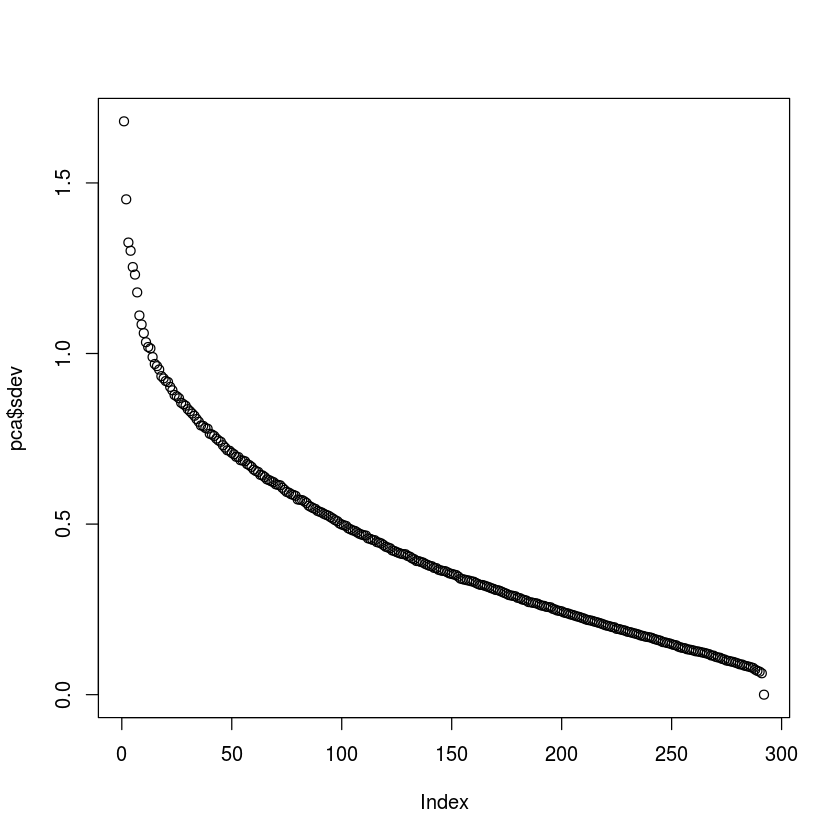

In [39]:
plot(pca$sdev)

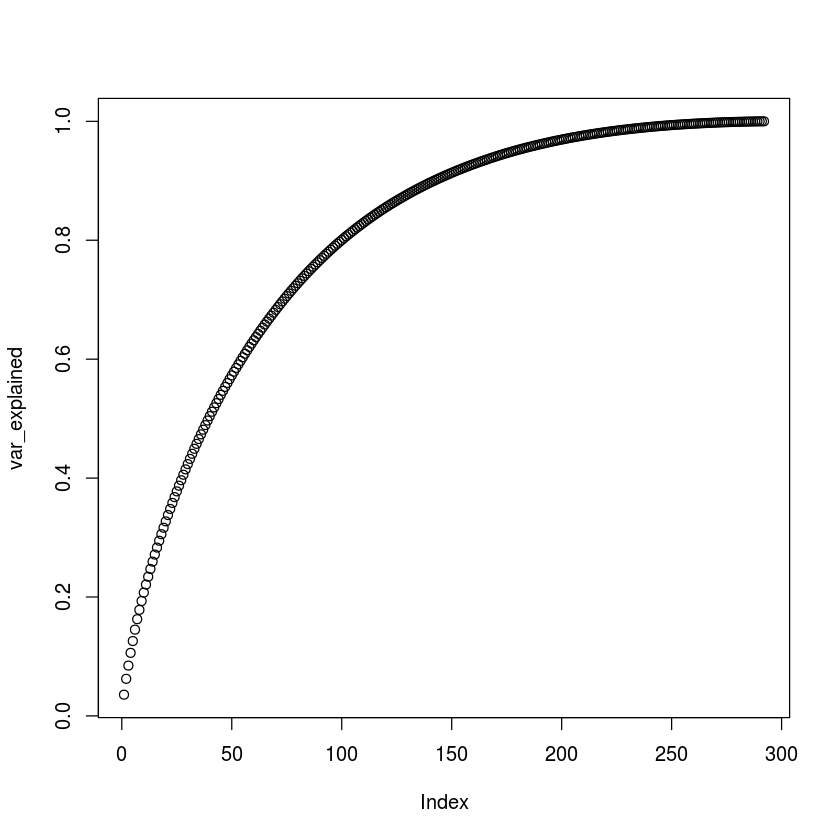

In [40]:
var_explained <- cumsum(pca$sdev^2/sum(pca$sdev^2))
plot(var_explained)

In [42]:
install.packages('ggrepel')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


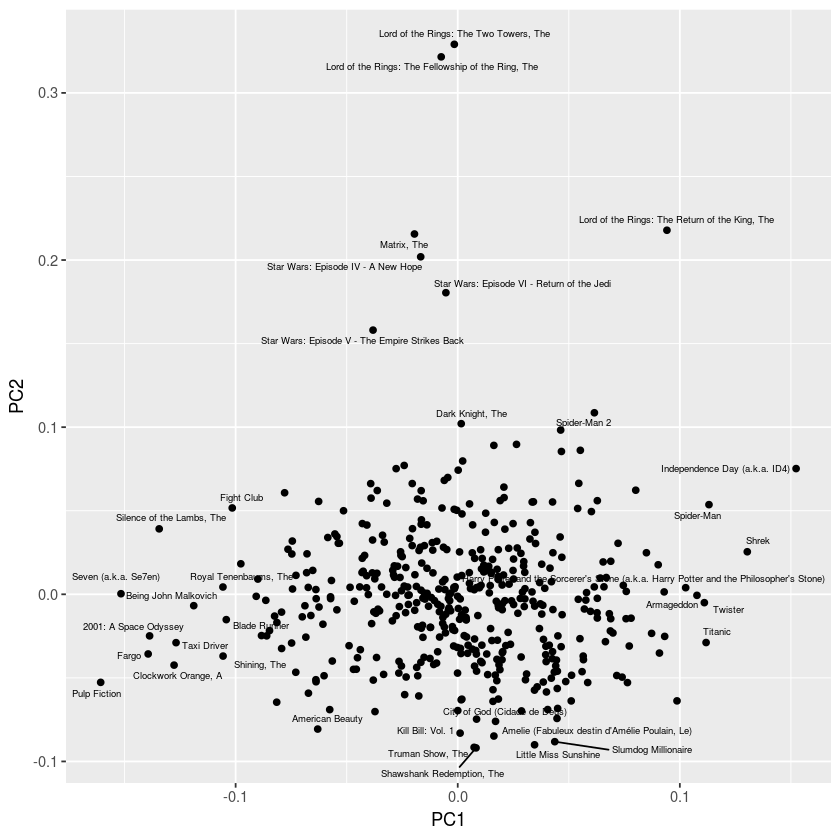

In [43]:
library(ggrepel)

pcs <- data.frame(pca$rotation, name = colnames(y))

highlight <- filter(pcs, PC1 < -0.1 | PC1 > 0.1 | PC2 < -0.075 | PC2 > 0.1)

pcs %>%  ggplot(aes(PC1, PC2)) + geom_point() + 
  geom_text_repel(aes(PC1, PC2, label=name),
                  data = highlight, size = 2)

In [44]:
pcs %>% select(name, PC1) %>% arrange(PC1) %>% slice(1:10)

name,PC1
Pulp Fiction,-0.1607547
Seven (a.k.a. Se7en),-0.1516154
Fargo,-0.1393822
2001: A Space Odyssey,-0.1387320
"Silence of the Lambs, The",-0.1344109
"Clockwork Orange, A",-0.1277136
Taxi Driver,-0.1268230
Being John Malkovich,-0.1188574
"Royal Tenenbaums, The",-0.1057119
"Shining, The",-0.1056547


In [45]:
pcs %>% select(name, PC1) %>% arrange(desc(PC1)) %>% slice(1:10)

name,PC1
Independence Day (a.k.a. ID4),0.15233885
Shrek,0.13036419
Spider-Man,0.11311536
Titanic,0.11181139
Twister,0.11103184
Armageddon,0.10770597
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone),0.10262600
Forrest Gump,0.09872009
"Lord of the Rings: The Return of the King, The",0.09418361
Enemy of the State,0.09317144


In [46]:
pcs %>% select(name, PC2) %>% arrange(PC2) %>% slice(1:10)

name,PC2
"Shawshank Redemption, The",-0.09190846
"Truman Show, The",-0.09156017
Little Miss Sunshine,-0.09005191
Slumdog Millionaire,-0.08818736
"Amelie (Fabuleux destin d'Amélie Poulain, Le)",-0.08481303
Kill Bill: Vol. 1,-0.08306883
American Beauty,-0.08064090
City of God (Cidade de Deus),-0.07603681
Mars Attacks!,-0.07469920
"Beautiful Mind, A",-0.07428814


In [47]:
pcs %>% select(name, PC2) %>% arrange(desc(PC2)) %>% slice(1:10)

name,PC2
"Lord of the Rings: The Two Towers, The",0.32907131
"Lord of the Rings: The Fellowship of the Ring, The",0.32156389
"Lord of the Rings: The Return of the King, The",0.21782576
"Matrix, The",0.21558045
Star Wars: Episode IV - A New Hope,0.20192365
Star Wars: Episode VI - Return of the Jedi,0.18044867
Star Wars: Episode V - The Empire Strikes Back,0.15806907
Spider-Man 2,0.10861542
"Dark Knight, The",0.10208297
Speed,0.09826192
